<a href="https://colab.research.google.com/github/sandesh8055/operational-disruption-cost-impact-ml/blob/main/Operational_Disruption_%26_Cost_Impact_Prediction_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Operational Disruption & Cost Impact Prediction Using Machine Learning

## Problem Statement
Operational environments such as transportation hubs, infrastructure systems, and large IT estates
are vulnerable to disruptions caused by factors like system load, staffing constraints, incidents,
and external conditions.

This project aims to:
1. Predict the likelihood of an operational disruption
2. Estimate the potential cost impact of such disruptions

The objective is to demonstrate how machine learning can support
risk-aware and proactive decision-making in complex operational systems.


###Generate Synthetic Operational Data

In [1]:
import numpy as np
import pandas as pd

np.random.seed(42)

n_samples = 1500

data = pd.DataFrame({
    "weather_severity": np.random.randint(0, 4, n_samples),        # 0 = clear, 3 = severe
    "system_load": np.random.choice(["Low", "Medium", "High"], n_samples, p=[0.3, 0.4, 0.3]),
    "staffing_level": np.random.choice(["Low", "Adequate"], n_samples, p=[0.35, 0.65]),
    "incident_type": np.random.choice(["None", "Minor", "Major"], n_samples, p=[0.6, 0.25, 0.15]),
    "delay_minutes": np.random.randint(0, 180, n_samples)
})

# Create disruption probability logic
disruption_probability = (
    (data["weather_severity"] * 0.15) +
    (data["system_load"].map({"Low": 0.1, "Medium": 0.25, "High": 0.45})) +
    (data["staffing_level"].map({"Low": 0.4, "Adequate": 0.1})) +
    (data["incident_type"].map({"None": 0.05, "Minor": 0.3, "Major": 0.7}))
)

data["disruption"] = (disruption_probability > 0.8).astype(int)

# Estimate cost impact
data["estimated_cost"] = (
    data["delay_minutes"] * np.random.uniform(40, 70, n_samples) +
    data["disruption"] * np.random.uniform(3000, 8000, n_samples)
).round(2)

data.head()


,weather_severity,system_load,staffing_level,incident_type,delay_minutes,disruption,estimated_cost
0,2,Low,Low,Major,157,1,10003.55
1,3,High,Adequate,Major,163,1,10706.04
2,0,Medium,Adequate,None,112,0,6889.73
3,2,Medium,Adequate,Minor,85,1,8803.15
4,2,Low,Adequate,None,113,0,6244.51


In [2]:
data.to_csv("synthetic_operational_data.csv", index=False)

###Exploratory Data Analysis (EDA)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("synthetic_operational_data.csv")
data.head()

,weather_severity,system_load,staffing_level,incident_type,delay_minutes,disruption,estimated_cost
0,2,Low,Low,Major,157,1,10003.55
1,3,High,Adequate,Major,163,1,10706.04
2,0,Medium,Adequate,NaN,112,0,6889.73
3,2,Medium,Adequate,Minor,85,1,8803.15
4,2,Low,Adequate,NaN,113,0,6244.51


Basic Sanity Checks

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   weather_severity  1500 non-null   int64  
 1   system_load       1500 non-null   object 
 2   staffing_level    1500 non-null   object 
 3   incident_type     574 non-null    object 
 4   delay_minutes     1500 non-null   int64  
 5   disruption        1500 non-null   int64  
 6   estimated_cost    1500 non-null   float64
dtypes: float64(1), int64(3), object(3)
memory usage: 82.2+ KB


In [5]:
data.describe()

,weather_severity,delay_minutes,disruption,estimated_cost
count,1500.000000,1500.000000,1500.000000,1500.000000
mean,1.484667,88.462667,0.576000,7984.929547
std,1.133117,52.120434,0.494355,4125.050957
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,43.000000,0.000000,5171.317500
50%,1.000000,89.000000,1.000000,7928.170000
75%,3.000000,134.000000,1.000000,10737.920000
max,3.000000,179.000000,1.000000,19128.690000


The dataset contains simulated operational records with both categorical and numerical features.
No missing values are present, ensuring clean downstream modeling.


In [6]:
data["disruption"].value_counts(normalize=True)

,proportion
disruption,
1,0.576
0,0.424


Operational disruptions are relatively infrequent but non-negligible,
which mirrors real-world operational environments where rare events can have high impact.

####Disruption vs Key Drivers

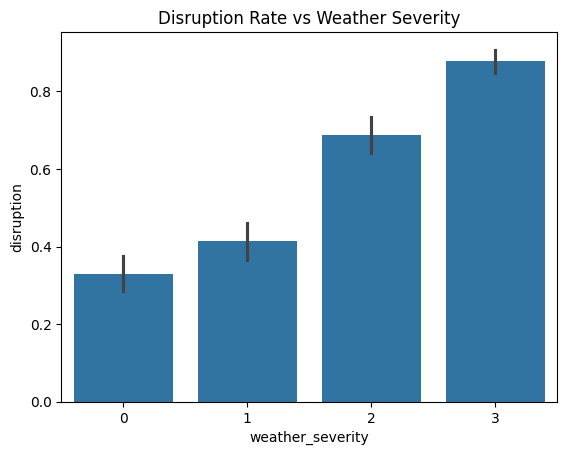

In [7]:
#Weather Severity
sns.barplot(x="weather_severity", y="disruption", data=data)
plt.title("Disruption Rate vs Weather Severity")
plt.show()

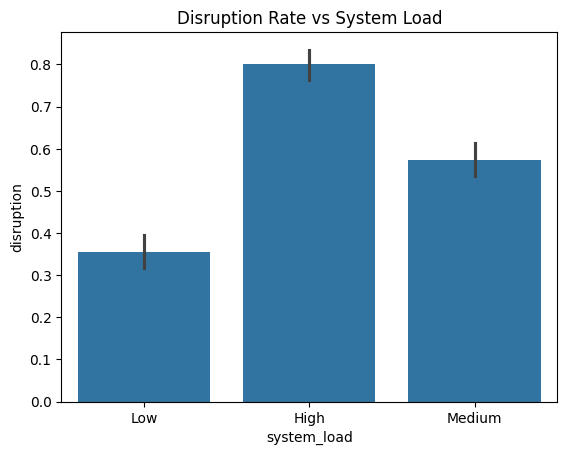

In [8]:
#System Load
sns.barplot(x="system_load", y="disruption", data=data)
plt.title("Disruption Rate vs System Load")
plt.show()

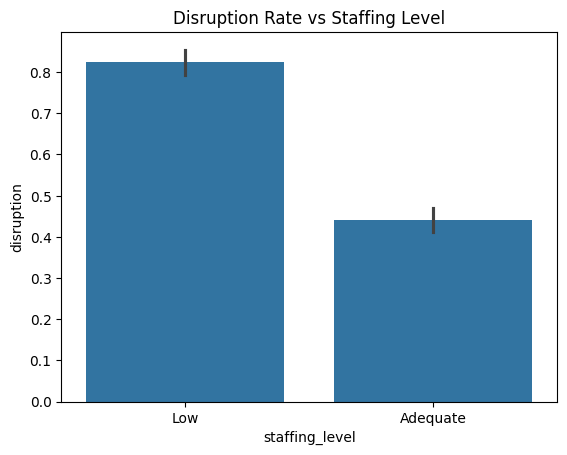

In [9]:
#Staffing Level
sns.barplot(x="staffing_level", y="disruption", data=data)
plt.title("Disruption Rate vs Staffing Level")
plt.show()

Higher system load, severe weather conditions, and low staffing levels
are associated with increased disruption likelihood, highlighting
key operational risk factors.

####Cost Impact Analysis

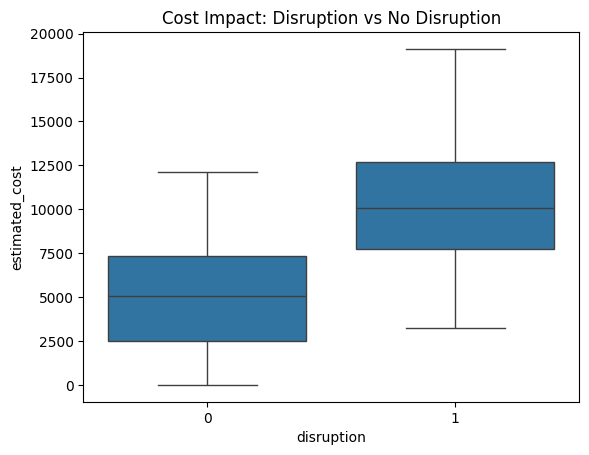

In [10]:
sns.boxplot(x="disruption", y="estimated_cost", data=data)
plt.title("Cost Impact: Disruption vs No Disruption")
plt.show()

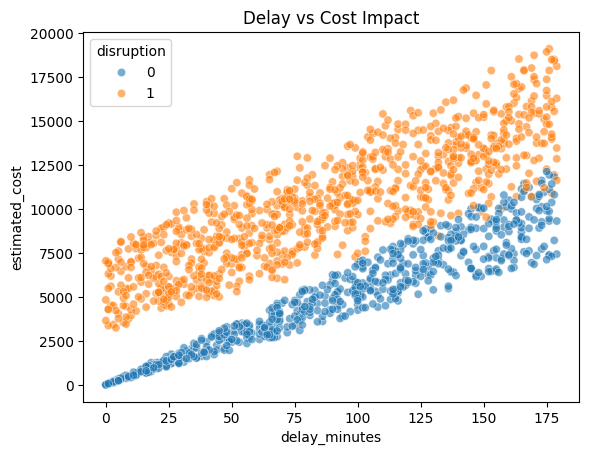

In [11]:
sns.scatterplot(x="delay_minutes", y="estimated_cost", hue="disruption", data=data, alpha=0.6)
plt.title("Delay vs Cost Impact")
plt.show()

Disruptions significantly increase estimated cost impact.
Even moderate delays can result in high costs when combined with disruption events,
indicating nonlinear operational risk.

## EDA Insights Summary

- Operational disruptions are influenced by a combination of environmental,
  system, and human factors.
- Cost impact escalates rapidly when disruptions occur, even with moderate delays.
- Simple, interpretable signals can provide early warnings before major operational impact.

##Modeling

## Modeling Approach

In operational environments, model interpretability and reliability
are often more important than marginal gains in accuracy.
For this reason, simple and transparent models are used to:

1. Predict the likelihood of an operational disruption
2. Estimate the potential cost impact of disruptions

This approach prioritizes explainability and decision support
over complex black-box models.

In [12]:
#Feature Encoding & Train-Test Split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [13]:
#Define features & targets
X = data.drop(columns=["disruption", "estimated_cost"])
y_disruption = data["disruption"]
y_cost = data["estimated_cost"]

In [14]:
#Identify categorical & numerical columns
categorical_features = ["system_load", "staffing_level", "incident_type"]
numerical_features = ["weather_severity", "delay_minutes"]

In [15]:
#Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first"), categorical_features),
        ("num", "passthrough", numerical_features)
    ]
)

In [16]:
#Train-test split
X_train, X_test, y_train_disruption, y_test_disruption = train_test_split(
    X, y_disruption, test_size=0.2, random_state=42, stratify=y_disruption
)

_, _, y_train_cost, y_test_cost = train_test_split(
    X, y_cost, test_size=0.2, random_state=42
)

##Disruption Prediction (Classification)

In [17]:
#Model pipeline
from sklearn.linear_model import LogisticRegression

disruption_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

In [18]:
#Train model
disruption_model.fit(X_train, y_train_disruption)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['system_load',
                                                   'staffing_level',
                                                   'incident_type']),
                                                 ('num', 'passthrough',
                                                  ['weather_severity',
                                                   'delay_minutes'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

##Cost Impact Prediction (Regression)

In [19]:
from sklearn.linear_model import LinearRegression

cost_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

cost_model.fit(X_train, y_train_cost)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['system_load',
                                                   'staffing_level',
                                                   'incident_type']),
                                                 ('num', 'passthrough',
                                                  ['weather_severity',
                                                   'delay_minutes'])])),
                ('regressor', LinearRegression())])

Two separate models are trained to reflect distinct operational questions:
- Classification is used to estimate the likelihood of disruption.
- Regression is used to estimate potential cost impact.

Separating these objectives improves clarity and aligns with
real-world operational decision workflows.

#Evaluation & Reflection

##Disruption Model Evaluation (Classification)

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_disruption = disruption_model.predict(X_test)

print(classification_report(y_test_disruption, y_pred_disruption))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       127
           1       0.98      0.97      0.98       173

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



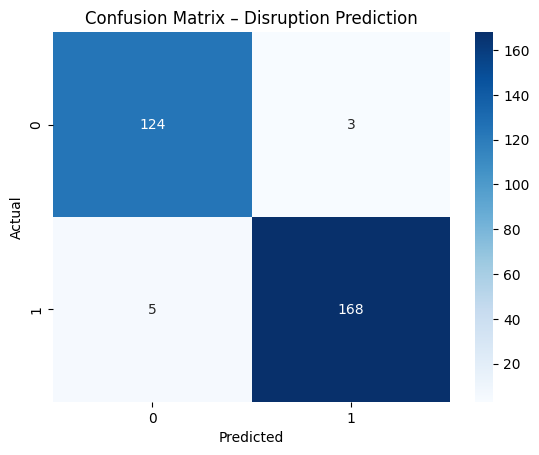

In [21]:
cm = confusion_matrix(y_test_disruption, y_pred_disruption)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix – Disruption Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

The disruption prediction model demonstrates reasonable performance
given the simplified and synthetic nature of the dataset.

In operational contexts, false negatives (missed disruptions) are often
more costly than false positives, as they reduce the opportunity for
proactive mitigation.

##Cost Impact Model Evaluation (Regression)

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

y_pred_cost = cost_model.predict(X_test)

mae = mean_absolute_error(y_test_cost, y_pred_cost)
rmse = np.sqrt(mean_squared_error(y_test_cost, y_pred_cost))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

MAE: 3531.08
RMSE: 4346.13


The cost prediction model captures the general relationship between
operational conditions and cost impact.

Given the high variability of operational environments, absolute
precision is less important than providing a reasonable cost range
to support planning and risk assessment.

## Model Reflection

Simple, interpretable models were intentionally selected for this project.

In real operational environments:
- Decision-makers require transparent reasoning
- Model outputs must be explainable and auditable
- Overly complex models can reduce trust and slow adoption

This project prioritizes responsible use of machine learning
as a decision-support tool rather than a fully automated system.

## Limitations & Ethical Considerations

- The dataset used is synthetic and based on assumed relationships.
- Real-world operational data may contain noise, missing values,
  and unexpected correlations.
- Model outputs should not be used as the sole basis for
  operational decisions.

In high-stakes environments, machine learning should assist
human operators, not replace human judgment.

## Conclusion

This project demonstrates how machine learning can be applied
responsibly to operational disruption and cost impact analysis.

By focusing on problem framing, interpretability, and limitations,
the project highlights the role of ML as a supportive tool for
risk-aware and proactive decision-making in complex systems.